# Assignment 2 - Supervised Machine Learning Fundamentals

## *Daniela Jiménez Lara*
Netid: dj216


Instructions for all assignments can be found [here](https://kylebradbury.github.io/ids705/notebooks/assignment_instructions.html).

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
- 1. the performance of a flexible method would be better than an inflexible method because a larger sample size would counterpoint the overfitting of the model 
- 2. the performance of a flexible method would be worse than an inflexible method because with a large number of predictors and a small n, a flexible model would be highly sensible to the variance, making it overfit. 
- 3. the performance of a flexible method would be better than an inflexible method because with if the relationship is non-linear, a flexible model would adapt the best to the data
- 4. the performance of a flexible method would be worse than an inflexible method because with a high variance a flexible model would capture all of these variace, overfitting the model and making it impossible to generalize. 


---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interested in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

- a)
    
    i) regression
    
    ii) inference, we are not looking to predict the CEO sallary but understand how they affect it. 
    
    iii) sample is 500, 3 predictors: profit, number of employees, industry
- b)
    
    i) classification
    
    ii) prediction, we are using past information to tell us what will be the outcome of a new product
    
    iii) sample 20, 13 predictors: price charged per prodcut, marketing budget, competition price, 10 extra variables
- c)
    
    i) regression
   
    ii) prediction, we are using past information to infrom the future outcome
    
    iii) sample: 52 weeks. 3 predictors: porcentual weekly change in: US market, british market, german market

**ANSWER**


---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

In [2]:
import numpy as np

X = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
y = np.array(["r", "r", "r", "b", "b", "r"])
t_p = np.array([0, 0, 0])
e_distance = np.sqrt(np.sum((X - t_p) ** 2, axis=1))

| $Obs1$ | $Obs2$ | $Obs3$ | $Obs4$ | $Obs5$ | $Obs6$ |
|--------|--------|--------|--------|--------|--------|
|3.0000  |2.0000  |3.1622  |2.2306  |1.4142  |1.7320  |


**b)**: Blue, the smallest one eucilidian distance is 1.41 corresponding to observation 5 which is labeled blue. 

**c)**: Red, the smallest three euclidian distances are from observation 2,5 and 6, corresponding to red, blue,red. By majority rule we would choose Red. 

**d)**: if the decision boundary is non-linear, a more flexible model is needed to capture this complex relationships, thus we would expect K to be small.


---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation? *Hint: your results should be identical to that of the scikit-learn implementation.*

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

In [3]:
# Skeleton code for part (a) to write your own kNN classifier


class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x_train = None
        self.y_train = None

    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

    # Save the training data to properties of this class
    def keep_highest(self, row):
        unique_values, counts = np.unique(row, return_counts=True)
        max_count_v = unique_values[np.argmax(counts)]
        return max_count_v

    def predict(self, x, k):
        # y_hat = [] # Variable to store the estimated class label for
        # Calculate the distance from each vector in x to the training data
        y_dict = {index: value for index, value in enumerate(self.y_train)}
        matrix = np.empty((0, self.x_train.shape[0]))
        for i in x:
            e_distance = np.sqrt(np.sum((self.x_train - i) ** 2, axis=1)).reshape(1, -1)
            matrix = np.vstack((matrix, e_distance))

        matrix_i = np.argpartition(matrix, k, axis=1)[:, :k]
        matrix_c = np.vectorize(y_dict.get)(matrix_i)
        y_hat = np.apply_along_axis(self.keep_highest, axis=1, arr=matrix_c)
        # Return the estimated targets
        return y_hat


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)


def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [4]:
import pandas as pd

path = "https://github.com/kylebradbury/ids705/raw/main/assignments/data/"

x_train_high = pd.read_csv(path + "A2_X_train_high.csv", header=None).values
x_train_low = pd.read_csv(path + "A2_X_train_low.csv", header=None).values
x_test_high = pd.read_csv(path + "A2_X_test_high.csv", header=None).values
x_test_low = pd.read_csv(path + "A2_X_test_low.csv", header=None).values
y_test_high = pd.read_csv(path + "A2_y_test_high.csv", header=None).values
y_test_low = pd.read_csv(
    path + "A2_y_test_low.csv",
    header=None,
).values
y_train_high = pd.read_csv(
    path + "A2_y_train_high.csv",
    header=None,
).values
y_train_low = pd.read_csv(path + "A2_y_train_low.csv", header=None).values

**(c)**

In [5]:
import time

# test class low
print(f"With my classifier:")

k = 5
test_K_low = Knn()
test_K_low.fit(x_train_low, y_train_low)
start_l = time.time()
y_h = test_K_low.predict(x_test_low, k)
end_l = time.time()
time_low = round(end_l - start_l, 5)
y_d = np.ravel(y_test_low)
ac_low = accuracy(y_d, y_h)

print(
    f"The time for the low dimensional dataset is {time_low} and the accuracy is {ac_low*100}%"
)

k = 5
test_K_high = Knn()
test_K_high.fit(x_train_high, y_train_high)
start_h = time.time()
y_h = test_K_high.predict(x_test_high, k)
end_h = time.time()
time_high = round(end_h - start_h, 5)
y_d = np.ravel(y_test_high)
ac_high = accuracy(y_d, y_h)

print(
    f"The time for the high dimensional dataset is {time_high} and the accuracy is {ac_high*100}%"
)

With my classifier:
The time for the low dimensional dataset is 0.28442 and the accuracy is 92.5%
The time for the high dimensional dataset is 0.3571 and the accuracy is 99.3%


**d)**

In [6]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

print(f"With sklearn.neighbors:")
# low
neigh.fit(x_train_low, y_train_low)
start_l = time.time()
y_h = neigh.predict(x_test_low)
end_l = time.time()
time_low2 = round(end_l - start_l, 5)
y_d = np.ravel(y_test_low)
ac_low = accuracy(y_d, y_h)

print(
    f"The time for the low dimensional dataset is {time_low2} and the accuracy is {ac_low*100}%"
)

# high
neigh.fit(x_train_high, y_train_high)
start_h = time.time()
y_h = neigh.predict(x_test_high)
end_h = time.time()
time_high2 = round(end_h - start_h, 5)
y_d = np.ravel(y_test_high)
ac_low = accuracy(y_d, y_h)
print(
    f"The time for the high dimensional dataset is {time_high2} and the accuracy is {ac_high*100}%"
)

# dif in times
times_fast_l = round(time_low / time_low2, 2)
times_fast_h = round(time_high / time_high2, 2)

print(
    f"The sklearn classifier is  {times_fast_l} times as fast as my classifier in the low dimensional data"
)
print(
    f"The sklearn classifier is  {times_fast_h} times as fast as my classifier in the high dimensional data"
)

With sklearn.neighbors:
The time for the low dimensional dataset is 0.01408 and the accuracy is 92.5%
The time for the high dimensional dataset is 0.10215 and the accuracy is 99.3%
The sklearn classifier is  20.2 times as fast as my classifier in the low dimensional data
The sklearn classifier is  3.5 times as fast as my classifier in the high dimensional data


/Users/danielajimenez/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/danielajimenez/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**e)**

Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

The drawback of a prediction process being slow, thus computattionally intensive, is that with large datasets it can become imposible to perform as larger storage and computational capactiy would be needed. Slow testing may be more problematic than slow traing when training is requiered only once and testing or predictions are requiered more than once. 

**ANSWER**:

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the decision boundaries in the rows and the columns in your figure? Which decision boundaries appear to best separate the two classes of data with respect to the training data? Which decision boundaries vary the most as the training data change? Which decision boundaries do you anticipate will generalize best to unseen data and why?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

**ANSWER**

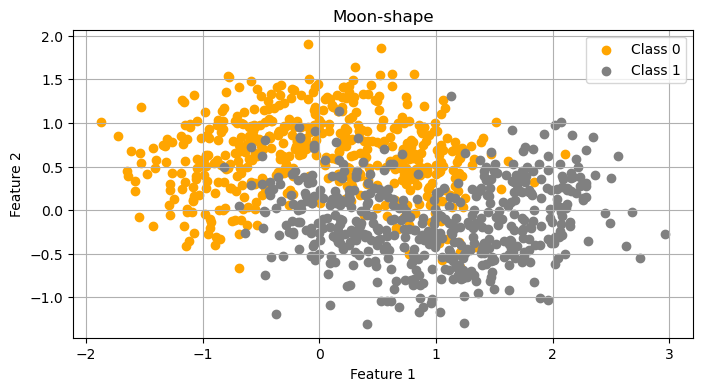

In [7]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import warnings
import sklearn

warnings.simplefilter(action="ignore", category=FutureWarning)

X, y = sklearn.datasets.make_moons(
    n_samples=1000, shuffle=True, noise=0.35, random_state=None
)
plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="orange", label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="grey", label="Class 1")
plt.title("Moon-shape")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

X, y = sklearn.datasets.make_moons(
    n_samples=1000, shuffle=True, noise=0.35, random_state=None
)
r_indexes_1 = np.random.choice(len(X), size=100, replace=True)
r_indexes_2 = np.random.choice(len(X), size=100, replace=True)
r_indexes_3 = np.random.choice(len(X), size=100, replace=True)

np.random.seed(66)

X_1 = X[r_indexes_1]
y_1 = y[r_indexes_1]

X_2 = X[r_indexes_2]
y_2 = y[r_indexes_2]

X_3 = X[r_indexes_3]
y_3 = y[r_indexes_3]


neigh_01_01 = KNeighborsClassifier(n_neighbors=1)
neigh_25_01 = KNeighborsClassifier(n_neighbors=25)
neigh_50_01 = KNeighborsClassifier(n_neighbors=50)


neigh_01_02 = KNeighborsClassifier(n_neighbors=1)
neigh_25_02 = KNeighborsClassifier(n_neighbors=25)
neigh_50_02 = KNeighborsClassifier(n_neighbors=50)


neigh_01_03 = KNeighborsClassifier(n_neighbors=1)
neigh_25_03 = KNeighborsClassifier(n_neighbors=25)
neigh_50_03 = KNeighborsClassifier(n_neighbors=50)


s1_01 = neigh_01_01.fit(X_1, y_1)
s1_25 = neigh_25_01.fit(X_1, y_1)
s1_50 = neigh_50_01.fit(X_1, y_1)

s2_01 = neigh_01_02.fit(X_2, y_2)
s2_25 = neigh_25_02.fit(X_2, y_2)
s2_50 = neigh_50_02.fit(X_2, y_2)

s3_01 = neigh_01_03.fit(X_3, y_3)
s3_25 = neigh_25_03.fit(X_3, y_3)
s3_50 = neigh_50_03.fit(X_3, y_3)

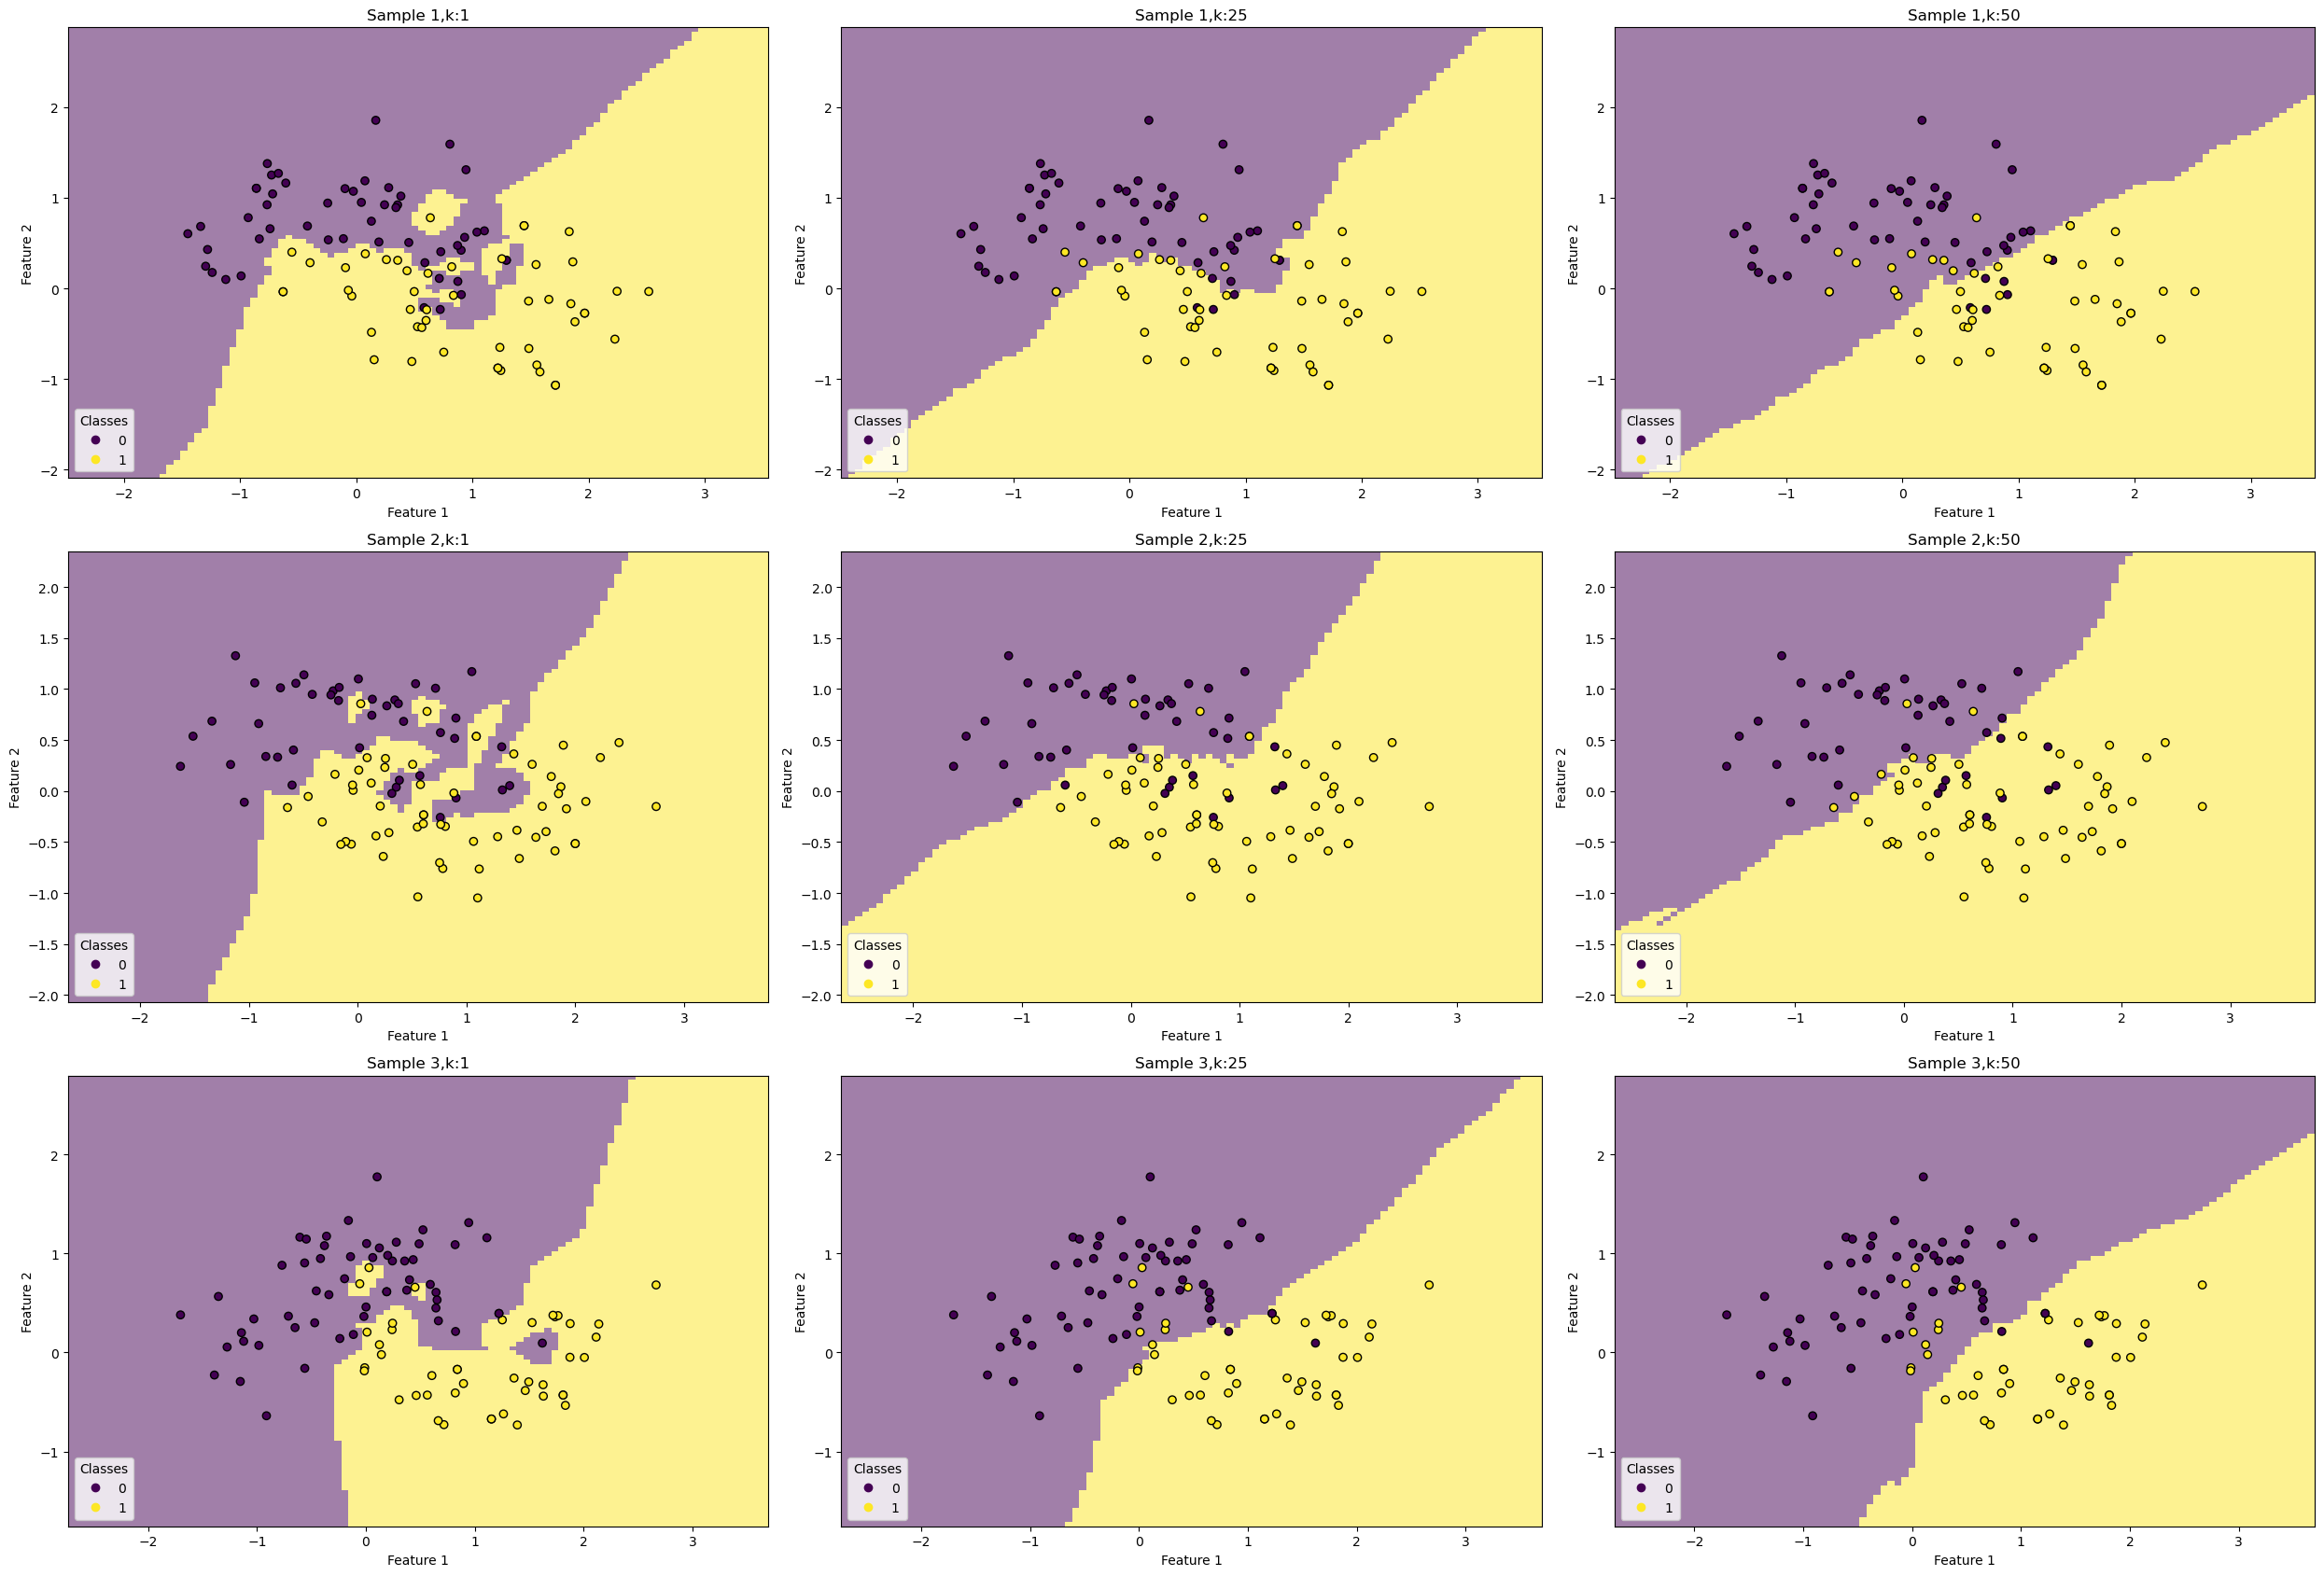

In [9]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

my_clasifiers = [[s1_01, s2_01, s3_01], [s1_25, s2_25, s3_25], [s1_50, s2_50, s3_50]]

list_samples_x = [X_1, X_2, X_3]
list_samples_y = [y_1, y_2, y_3]
k_title = [1, 25, 50]
# grid
fig, axs = plt.subplots(3, 3, figsize=(25, 17))

# iterate sample and classifiers
for j in range(len(my_clasifiers)):
    for i, (X, y, estimator) in enumerate(
        zip(list_samples_x, list_samples_y, my_clasifiers[j])
    ):
        disp = DecisionBoundaryDisplay.from_estimator(
            estimator,
            X,
            response_method="predict",
            plot_method="pcolormesh",
            xlabel="Feature 1",
            ylabel="Feature 2",
            shading="auto",
            alpha=0.5,
            ax=axs[i, j],
        )

        scatter = axs[i, j].scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")

        axs[i, j].legend(
            scatter.legend_elements()[0],
            np.unique(y),
            loc="lower left",
            title="Classes",
        )
        _ = axs[i][j].set_title(f"Sample {i+1},k:{k_title[j]}")

plt.tight_layout()
plt.show()


**(e)** 

- The bigger the K neighnbors, the less accurate our classification seems to be, when k=50, the classifier seems to devide our dataset in half while with lower K, the classifier captures the different classes better and is more flexible. 
- The decision boundaries that appear to best separate the two classes of data with respect to the training data are those with a K of 25, since the lowest k seem to overfit the data. 
- The decision boundaries that varies the most as the training data change are those with the lowest K=1, because it is the most flexible and is overfitting the data.
- The decision boundaries that will generalize best to unseen data are those where K equals 25. 

**(f)** 
- The bias-variance trade-off can be clearly seen in this graphs with the change in the decision boundaries as the data changes and our K grows, ie as our model increases or decreases flexibility. The bias-variance tradeoff tells us that with more flexible models, the variance will increase and the bias will decrease, impacting the MSE.  In our graphs we can see the variance increasing with more flexible models when k=1 , however as we descrease the flexibility we see less variance but more error (bias).


---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [10]:
from sklearn.datasets import make_moons


Xtrain, ytrain = sklearn.datasets.make_moons(
    n_samples=1000, shuffle=True, noise=0.35, random_state=None
)

Xtest, ytest = sklearn.datasets.make_moons(
    n_samples=1000, shuffle=True, noise=0.35, random_state=None
)


def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy


score_train_l = []
score_test_l = []

for i in range(1, 501):
    knn_train = KNeighborsClassifier(n_neighbors=i).fit(Xtrain, ytrain)
    y_hat_train = knn_train.predict(Xtrain)
    score_train = 1 - accuracy(
        ytrain,
        y_hat_train,
    )
    score_train_l.append(score_train)

    knn_test = KNeighborsClassifier(n_neighbors=i).fit(Xtrain, ytrain)
    y_hat_test = knn_test.predict(Xtest)
    score_test = 1 - accuracy(ytest, y_hat_test)
    score_test_l.append(score_test)

Text(0.5, 1.0, 'Classification error for K=1 to K=500')

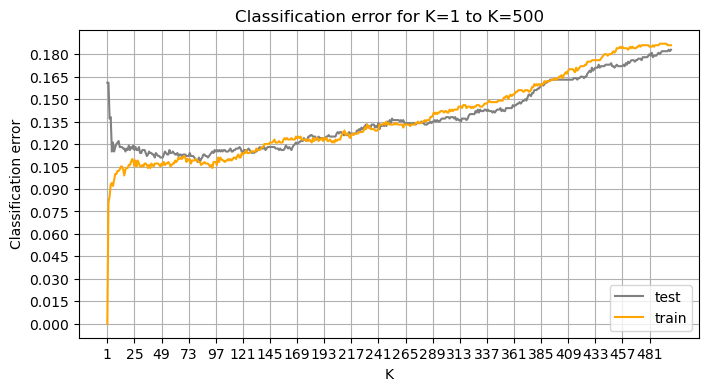

In [11]:
x_azis = range(1, 501)

plt.figure(figsize=(8, 4))

plt.plot(x_azis, score_test_l, c="grey", label="test")
plt.plot(x_azis, score_train_l, c="orange", label="train")

plt.legend()
plt.grid(True)

plt.xticks(np.arange(min(x_azis), max(x_azis) + 1, 24))
plt.yticks(np.arange(0, 0.185, 0.015))

# Add labels and title
plt.xlabel("K")
plt.ylabel("Classification error")
plt.title("Classification error for K=1 to K=500")

In [20]:
optimal_k_value = np.argmin(score_test_l)

print(f"The optimal value of K is : {optimal_k_value}")

The optimal value of K is : 80



**(c)** What trend do you see in the results?
The overall trend shows that as k increases and our model looses flexibility, the classification error also increases. However there is an inflection point on the test data where the classification error decreases as the model looses flexibility, before starting to increase. 

**(d)** What values of $k$ represent high bias and which represent high variance?
The of K that represent high bias are those on the right side of the plot, as K increases, on the other hand, k values closer to one have a high variance. 


**(e)** What is the optimal value of $k$ and why?
The optimal K is the inflection point where our classification error is minimal, in this case 80. 

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?
Depending on the type of model, different hyperparameters can be set beforehand, these might change the learning rates, overfit, etc. 



---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [13]:
import numpy as np
import pandas as pd

path = "https://github.com/kylebradbury/ids705/raw/main/assignments/data/"

train = pd.read_csv(path + "A2_Q7_train.csv")
test = pd.read_csv(path + "A2_Q7_test.csv")
x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values

**ANSWER**

**a)**

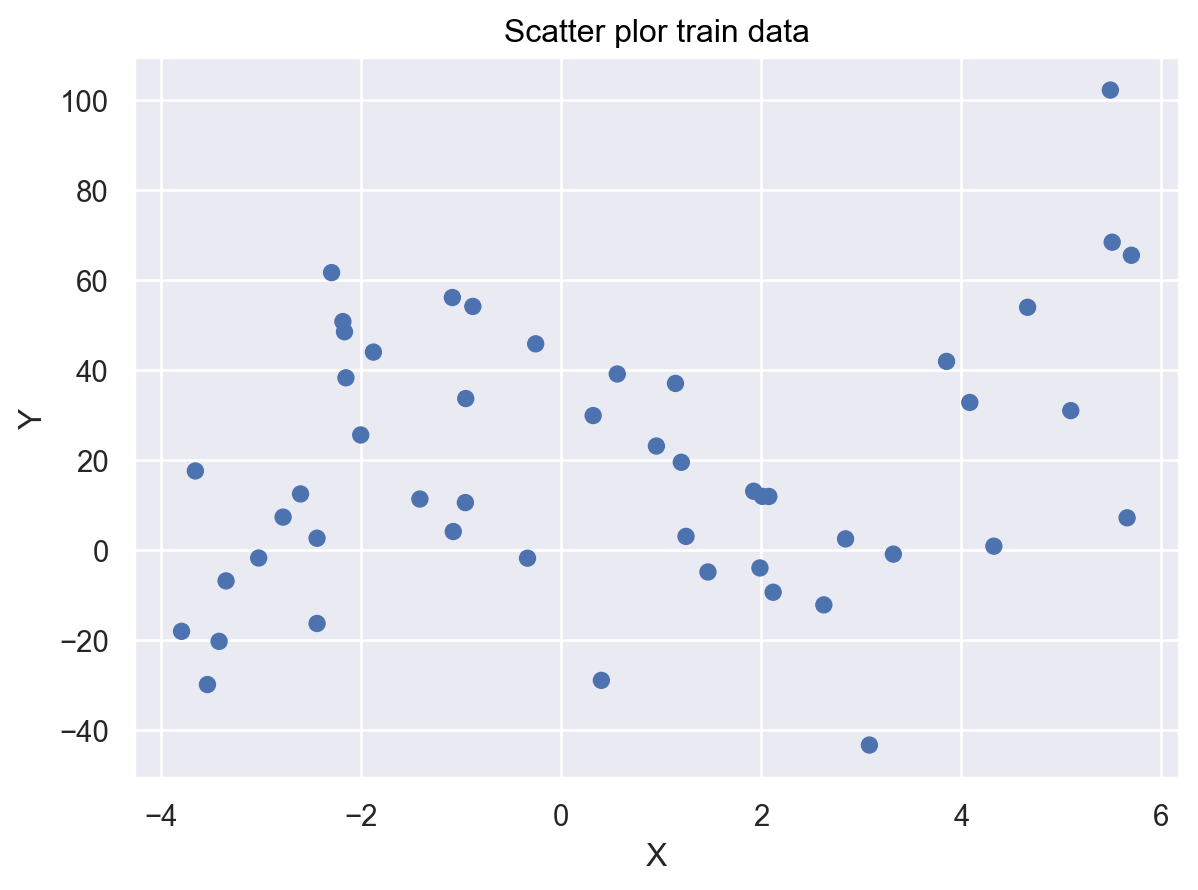

In [14]:
import seaborn.objects as so

(
    so.Plot(x=x_train, y=y_train)
    # .add(so.Line(color="red"), so.PolyFit(order=1))
    .add(so.Dot())
    .label(
        x="X",
        y="Y",
        title="Scatter plor train data",
    )
)

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score

x_train = x_train.reshape(-1, 1)

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
print(f"score, {reg.score(x_train, y_train)}")
print(f"coefficients:{reg.coef_}")
print(f"intercept: {reg.intercept_}")
y_train_hat = reg.predict(x_train)

# r2
r2 = r2_score(y_train, y_train_hat)
print(f"R^2: {r2}")

# r2 adjusted
n_samples = len(y_train)
n_features = x_train.shape[1]

r_adjusted = adjusted_r2 = 1 - (
    (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
)

print(f"adjusted R^2: {r_adjusted}")

# MSE
mse = mean_squared_error(y_train, y_train_hat)
print(f"MSE: {mse}")

score, 0.06486123304769698
coefficients:[2.59072826]
intercept: 17.204928179405222
R^2: 0.06486123304769698
adjusted R^2: 0.0453791754028573
MSE: 791.4167471701106


**b)**
- $y = 17.2 + 2.6 x$, 
- $R^2$= 0.06
- $MSE$= 791

In [16]:
x_train_2 = np.column_stack((x_train**3, x_train**2, x_train))

reg2 = LinearRegression().fit(x_train_2, y_train)

reg2.score(x_train_2, y_train.reshape(-1, 1))

print(f"score, {reg2.score(x_train_2, y_train)}")
print(f"coefficients:{reg2.coef_}")
print(f"intercept: {reg2.intercept_}")

y_train_hat_2 = reg2.predict(x_train_2)

r2 = r2_score(y_train, y_train_hat_2)
print(f"R^2: {r2}")

n_samples = len(y_train)
n_features = x_train_2.shape[1]

r_adjusted = adjusted_r2 = 1 - (
    (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
)

print(f"adjusted R^2: {r_adjusted}")


mse = mean_squared_error(y_train, y_train_hat_2)
print(f"MSE: {mse}")

score, 0.39633784112900716
coefficients:[ 0.89700921 -2.12568583 -9.25191526]
intercept: 24.155434157795067
R^2: 0.39633784112900716
adjusted R^2: 0.3569685698982902
MSE: 510.88497135071225


**c)**

For this transformation we will be using: 
- $y = a_0 + a_1 x^3 + a_2 x^2 + a_3 x$
- $y = 24.15 + 0.89 x^3 -2.12 x^2 -9.25 x$

- The $R^2$ is 0.39

- $Adjusted  R^2$ is 0.35

- The $MSE$ is 510.88


**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).



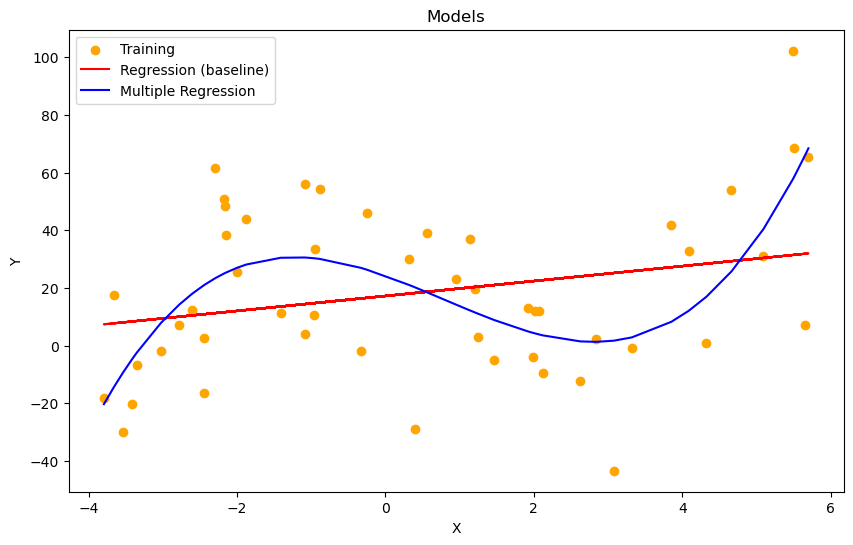

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, c="orange", label="Training")

# linear regression curve
regression_line = reg.predict(x_train.reshape(-1, 1))
plt.plot(x_train, regression_line, color="red", label="Regression (baseline)")

# multiple regression line
sorted_indices = np.argsort(x_train.flatten())
x_train_sorted = x_train[sorted_indices]
y_train_hat_2_sorted = y_train_hat_2[sorted_indices]

plt.plot(
    x_train_sorted, y_train_hat_2_sorted, color="blue", label="Multiple Regression "
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Models")
plt.legend()
plt.show()

In [18]:
# model 1
print("Model 1")
y_test_hat = reg.predict(x_test.reshape(-1, 1))

r2 = r2_score(y_test, y_test_hat)
print(f"R^2: {r2}")

n_samples = len(y_test)
n_features = 1

adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
print(f"adjusted R^2: {adjusted_r2}")

mse = mean_squared_error(y_test, y_test_hat)
print(f"MSE: {mse}")


# model 2
print("Model 2")
x_test_2 = np.column_stack((x_test**3, x_test**2, x_test))
y_test_hat_2 = reg2.predict(x_test_2)

r2 = r2_score(y_test, y_test_hat_2)
print(f"R^2: {r2}")
n_samples = len(y_test)
n_features = x_test_2.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
print(f"adjusted R^2: {adjusted_r2 }")

mse = mean_squared_error(y_test, y_test_hat_2)
print(f"MSE: {mse}")

Model 1
R^2: -0.13289928472598378
adjusted R^2: -0.19583813387742732
MSE: 1116.6632365616085
Model 2
R^2: 0.22945384708541128
adjusted R^2: 0.08497644341392585
MSE: 759.5031373347693


**(e)** 

- Model 1 (linaer regression) and Model 2 (multiple linear regression)

|   | Model 1 train | Model 1 test | Model 2 train | Model 2 test|
|------  |-------|-------|-------|-------|
| **R2** | 0.06     | -0.132     | 0.39    | 0.22   |
| **Adj R2**| 0.0453    | -0.19   | 0.35     | 0.0849   |
| **MSE**| 791.42     | 1116.66     | 510.88     | 759.503  |




**(f)**

- Comparing Model 1 in training to Model 2 in training, Model 2 is better as it has lower MSE and higher Adjusted R^2

- Comparing Model 1 in tesing to Model 2 in testing, Model 2 is better as it has a lower MSE and a higher Adjusted R^2

**(g)**
If the test data was significantly different than the training data as my modelis not overfitting the data,it  would be accurate in its generalization. 

